In [1]:
# Heart Failure Prediction (심부전 예측)

# 심부전은 CVD로 인해 발생하는 일반적인 이벤트이며이 데이터 세트에는 심부전으로 
# 인한 사망률을 예측하는 데 사용할 수있는 12 가지 기능이 포함되어 있습니다.

# age: 환자의 나이
# anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
# creatinine_phosphokinase: 크레아틴키나제 검사 결과
# diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
# ejection_fraction: 박출계수 (%)
# high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
# platelets: 혈소판 수 (kiloplatelets/mL)
# serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
# serum_sodium: 혈중 나트륨 레벨 (mEq/L)
# sex: 성별 (0: 여성, 1: 남성)
# smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
# time: 관찰 기간 (일)
# DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('C:/Users/tmxhs/0_youngwoo/0_caggle/heart_failure_clinical_records_dataset.csv')

In [3]:
df.shape

(299, 13)

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# 컬럼별 결측 수
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
df.describe()
# creatinine_phosphokinase, 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [10]:
for i in df:
    print(df[i].value_counts()) # zero variance feature 처리 등..

60.000    33
50.000    27
65.000    26
70.000    25
45.000    19
55.000    17
75.000    11
58.000    10
53.000    10
63.000     8
80.000     7
72.000     7
42.000     7
40.000     7
85.000     6
62.000     5
68.000     5
52.000     5
49.000     4
61.000     4
51.000     4
73.000     4
59.000     4
46.000     3
64.000     3
82.000     3
90.000     3
69.000     3
95.000     2
48.000     2
60.667     2
67.000     2
44.000     2
66.000     2
77.000     2
78.000     2
54.000     2
57.000     2
94.000     1
56.000     1
41.000     1
87.000     1
79.000     1
86.000     1
43.000     1
81.000     1
47.000     1
Name: age, dtype: int64
0    170
1    129
Name: anaemia, dtype: int64
582     47
66       4
129      4
84       3
231      3
        ..
395      1
754      1
2334     1
2695     1
514      1
Name: creatinine_phosphokinase, Length: 208, dtype: int64
0    174
1    125
Name: diabetes, dtype: int64
35    49
38    40
40    37
25    36
30    34
60    31
50    21
45    20
20    18
55     3
15 

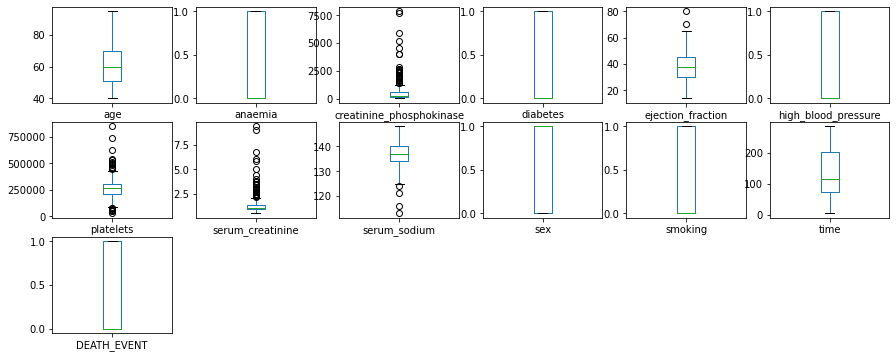

In [11]:
for i, j in enumerate(df, 1):
    plt.subplot(3, 6, i)
    df[j].plot.box(figsize = (15,6))
# creatinine_phosphokinase	, ejection_fraction, platelets, serum_creatinine, serum_sodium 이상치가 있는데 
# ejection_fraction, serum_sodium은 봐줄만하다

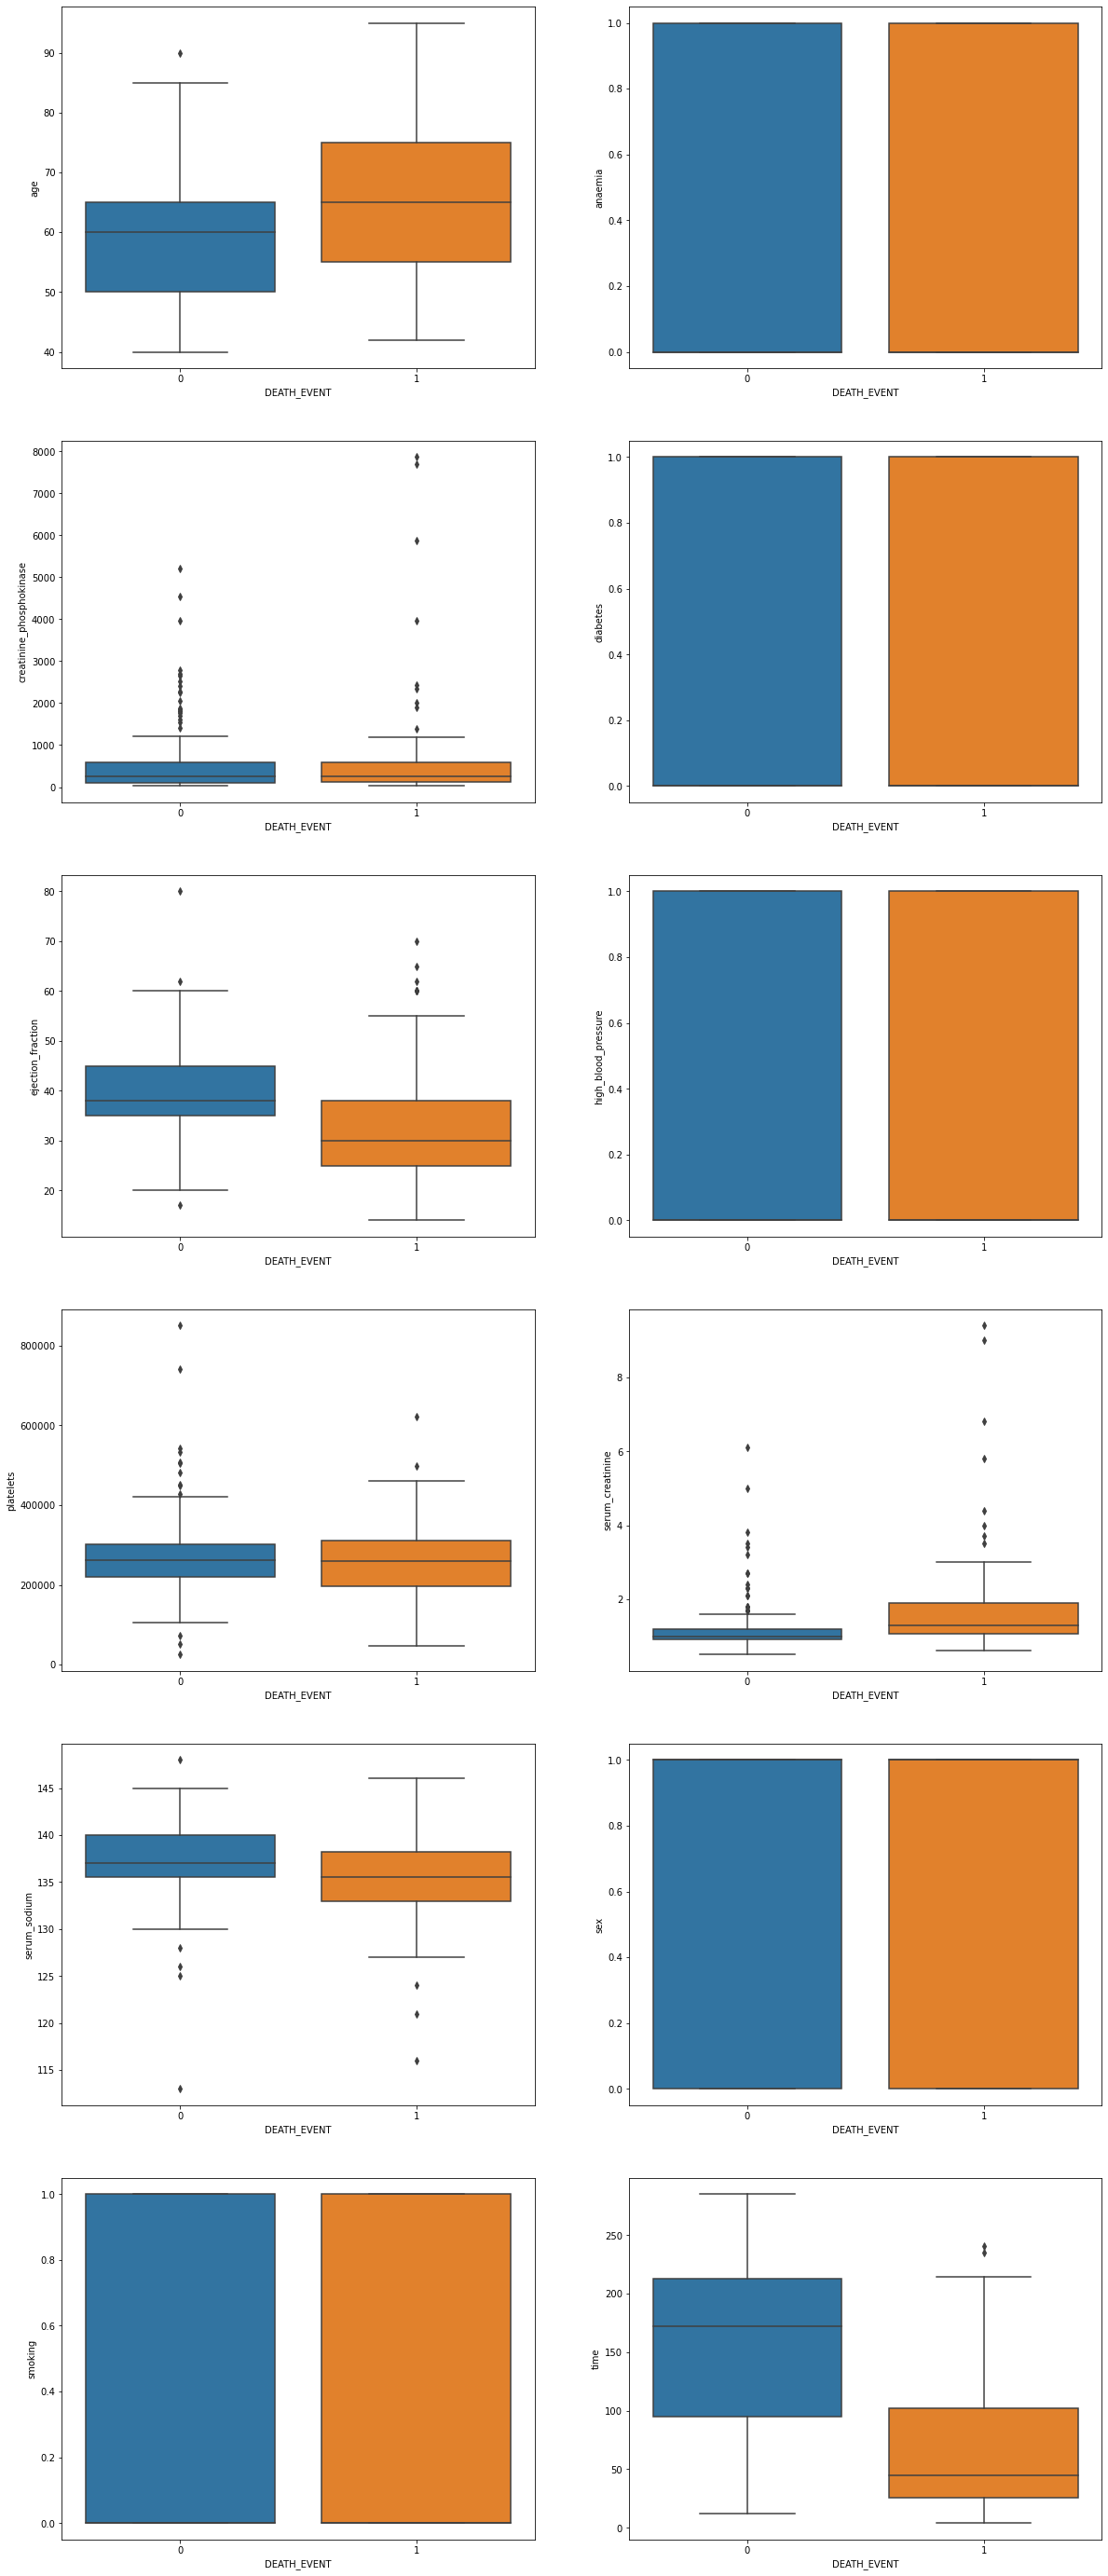

In [13]:
plt.figure(figsize = (20,50))

for i, j in enumerate(df.iloc[:,:-1], 1):
    plt.subplot(6, 2, i)
    sns.boxplot(x=df['DEATH_EVENT'], y=df[j])

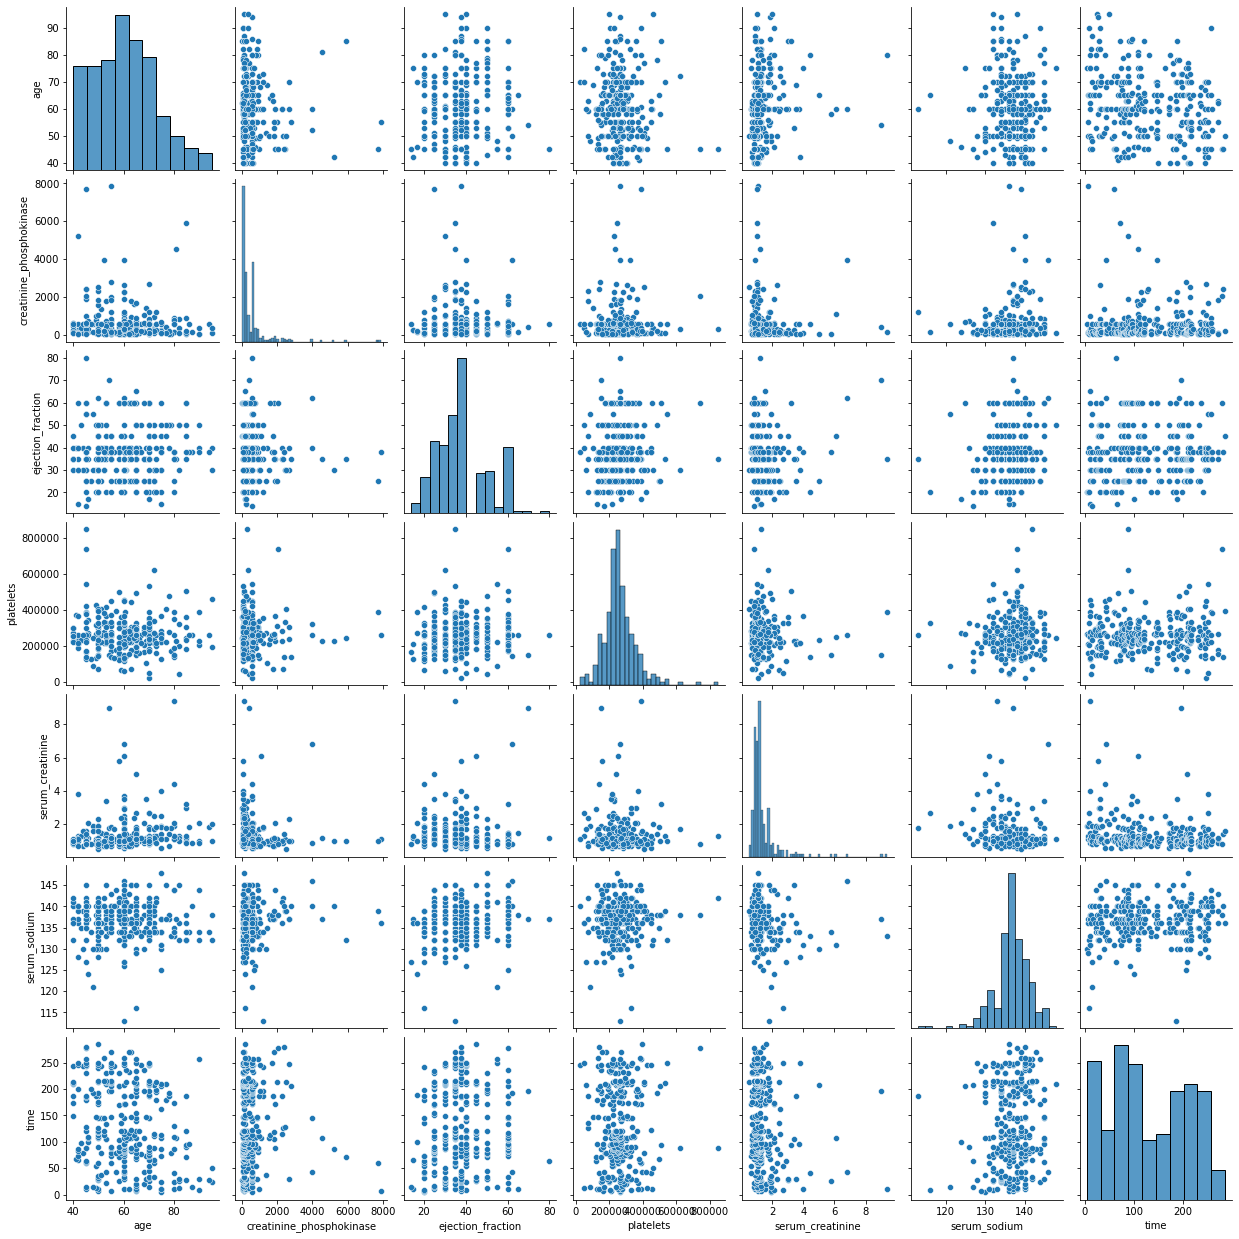

In [14]:
# 실수형 변수별 대여량
df_int = df[ ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time'] ]
sns.pairplot(df_int)

plt.show()

<AxesSubplot:>

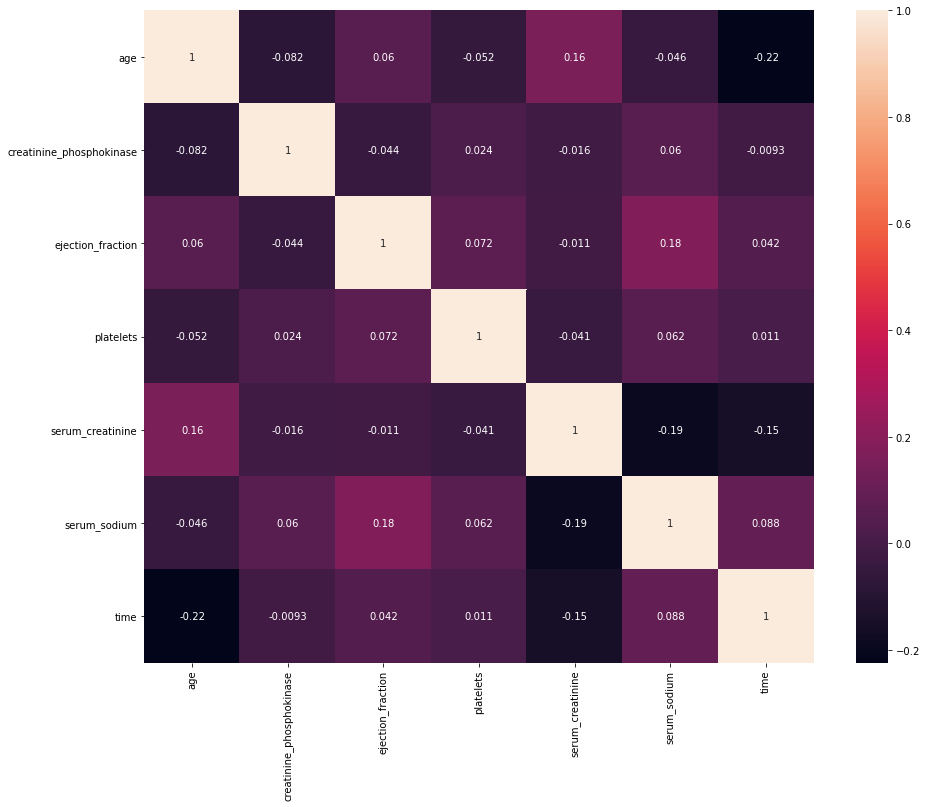

In [15]:
df_int_corr = df_int.corr()

fig = plt.figure(figsize= (15,12))
sns.heatmap(df_int_corr, annot=True)
# 선형 관계가 없어보임

## 데이터 나누기

In [16]:
df_input = np.array(df.iloc[:,:-1])
df_target = np.array(df['DEATH_EVENT'])

In [17]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    df_input, df_target, random_state=506, stratify=df_target, test_size=0.3)

## 스케일링

In [18]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

#Compute the mean and std to be used for later scaling.
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## 범주형 변수 고려 안하고.... 모두 스케일링

## KNN

In [19]:
from sklearn.neighbors import KNeighborsClassifier

KNN_test_score = []
KNN_train_score = []

for i in range(1, len(train_input)+1):
    kn = KNeighborsClassifier(n_neighbors = i)

    kn.fit(train_scaled, train_target)
    
    KNN_test_score.append(kn.score(test_scaled, test_target))
    KNN_train_score.append(kn.score(train_scaled, train_target))

print('k =', KNN_test_score.index(max(KNN_test_score)) + 1, '일때 test점수가', round(max(KNN_test_score),4), '로 가장높고',
    '이때, train점수가', round(KNN_train_score[KNN_test_score.index(max(KNN_test_score))],4), '입니다.')

k = 3 일때 test점수가 0.8 로 가장높고 이때, train점수가 0.8373 입니다.


In [20]:
kn = KNeighborsClassifier(n_neighbors = 3)

kn.fit(train_scaled, train_target)

KNeighborsClassifier(n_neighbors=3)

In [21]:
print(kn.score(test_scaled, test_target))
print(kn.score(train_scaled, train_target))

0.8
0.8373205741626795


In [22]:
y_pred = kn.predict(test_scaled)

y_pred_prob= kn.predict_proba(test_scaled) # 확률 산출 [0, 1]

In [23]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_target, y_pred))

[[56  5]
 [13 16]]


In [24]:
from sklearn.metrics import classification_report

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86        61
           1       0.76      0.55      0.64        29

    accuracy                           0.80        90
   macro avg       0.79      0.73      0.75        90
weighted avg       0.80      0.80      0.79        90



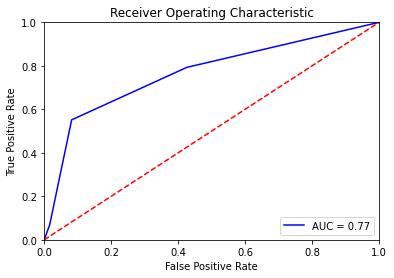

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## logistic regression

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

LogisticRegression()

In [27]:
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target)) 

0.8277511961722488
0.9


In [28]:
y_pred = lr.predict(test_scaled)

y_pred_prob= lr.predict_proba(test_scaled) # 확률 산출 [0, 1]

In [29]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(test_target, y_pred))

[[57  4]
 [ 5 24]]


In [30]:
from sklearn.metrics import classification_report

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93        61
           1       0.86      0.83      0.84        29

    accuracy                           0.90        90
   macro avg       0.89      0.88      0.88        90
weighted avg       0.90      0.90      0.90        90



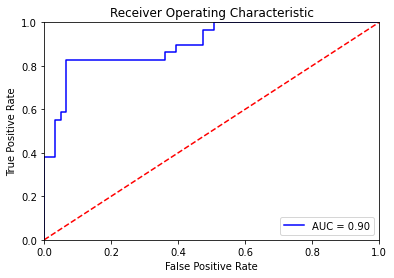

In [31]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## LASSO 변수선택

In [32]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_input, train_target)

Lasso()

In [33]:
train_score = []
test_score = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:

    lasso = Lasso(alpha=alpha, max_iter=10000)

    lasso.fit(train_input, train_target)

    train_score.append(lasso.score(train_input, train_target))
    test_score.append(lasso.score(test_input, test_target))

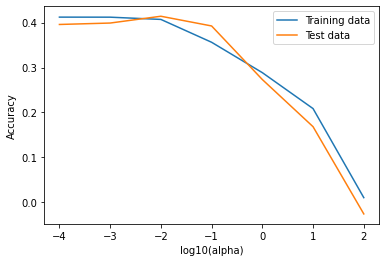

In [34]:
plt.plot(np.log10(alpha_list), train_score, label = "Training data")
plt.plot(np.log10(alpha_list), test_score, label = "Test data")
plt.legend()
plt.xlabel("log10(alpha)")
plt.ylabel("Accuracy")
plt.show()

In [35]:
lasso = Lasso(alpha=0.001)
lasso.fit(train_input, train_target)

Lasso(alpha=0.001)

In [36]:
print(lasso.score(train_input, train_target))
print(lasso.score(test_input, test_target))

0.41210406623949025
0.3990442768989947


In [37]:
print(np.sum(lasso.coef_ == 0))

0


In [38]:
lasso.coef_

array([ 6.26851583e-03,  3.52000710e-03,  3.85928890e-05, -5.21813962e-03,
       -7.81313611e-03, -5.70928325e-02, -2.82796715e-07,  9.18976768e-02,
       -8.22517670e-03, -7.47782678e-02, -1.08671734e-02, -2.77709770e-03])

## 의사결정나무

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

decision_tree = DecisionTreeClassifier()
print(decision_tree._estimator_type)

classifier


In [40]:
decision_tree.fit(train_scaled, train_target)

DecisionTreeClassifier()

In [41]:
y_pred_prob= decision_tree.predict_proba(test_scaled) # 확률 산출 [0, 1]

y_pred = decision_tree.predict(test_scaled)
y_pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(test_target, y_pred)
accuracy # 정확도 = 예측결과 정답인 데이터의 개수 / 예측한 전체 데이터의 수

0.8

In [43]:
from sklearn.metrics import classification_report

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85        61
           1       0.67      0.76      0.71        29

    accuracy                           0.80        90
   macro avg       0.77      0.79      0.78        90
weighted avg       0.81      0.80      0.80        90



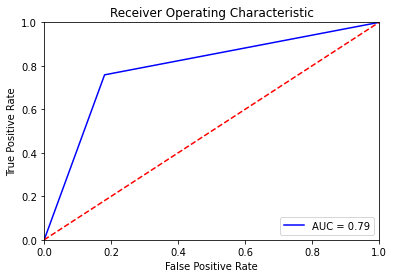

In [44]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## Random Forest

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 32)
random_forest.fit(train_scaled, train_target)

y_pred_prob= random_forest.predict_proba(test_scaled) # 확률 산출 [0, 1]
y_pred = random_forest.predict(test_scaled)

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89        61
           1       0.79      0.76      0.77        29

    accuracy                           0.86        90
   macro avg       0.84      0.83      0.83        90
weighted avg       0.85      0.86      0.85        90



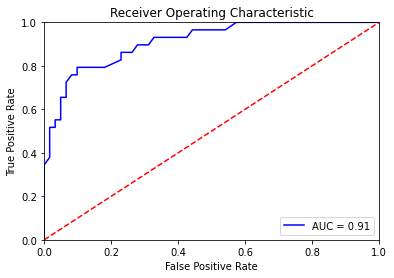

In [46]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## SVM

In [47]:
from sklearn import svm

svm_model = svm.SVC(probability=True)

In [48]:
svm_model.fit(train_scaled, train_target)

y_pred_prob= svm_model.predict_proba(test_scaled) # 확률 산출 [0, 1]
y_pred = svm_model.predict(test_scaled)

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86        61
           1       0.70      0.72      0.71        29

    accuracy                           0.81        90
   macro avg       0.78      0.79      0.79        90
weighted avg       0.81      0.81      0.81        90



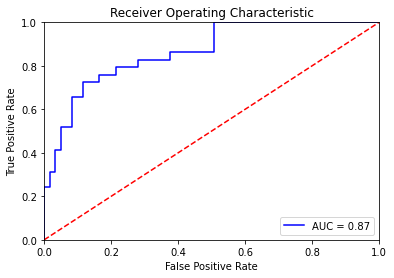

In [49]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob[:,1])

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## SGDClassifier

In [50]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()

In [51]:
sgd_model.fit(train_scaled, train_target)

y_pred_prob = sgd_model.decision_function(test_scaled)
# y_pred_prob= sgd_model.predict_proba(test_scaled) # 확률 산출 [0, 1]
y_pred = sgd_model.predict(test_scaled)

print(classification_report(test_target, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82        61
           1       0.61      0.76      0.68        29

    accuracy                           0.77        90
   macro avg       0.74      0.76      0.75        90
weighted avg       0.79      0.77      0.77        90



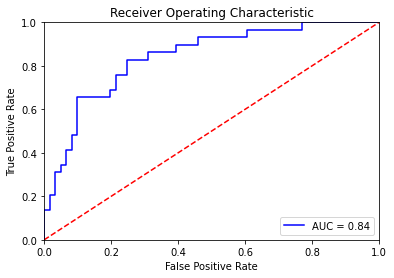

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# sgd_model.fit(train_scaled, train_target)

# score_roc = sgd_model.decision_function(train_target)

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [ ]:
sgd_model.fit(train_scaled, train_target)

# score_roc = sgd_model.decision_function(train_target)

fpr, tpr, thresholds = roc_curve(test_target, y_pred_prob)

roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

## 결론

In [78]:
y_pred_prob1 = kn.predict_proba(test_scaled) 
y_pred_prob2 = lr.predict_proba(test_scaled) 
y_pred_prob3 = decision_tree.predict_proba(test_scaled) 
y_pred_prob4 = random_forest.predict_proba(test_scaled) 
y_pred_prob5 = svm_model.predict_proba(test_scaled) 
y_pred_prob6 = sgd_model.decision_function(test_scaled)

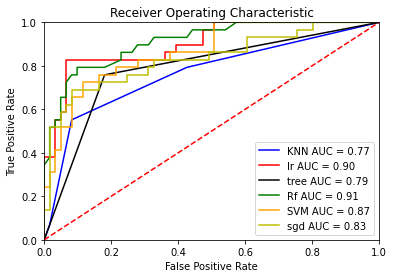

In [83]:
fpr1, tpr1, thresholds1 = roc_curve(test_target, y_pred_prob1[:,1])
fpr2, tpr2, thresholds2 = roc_curve(test_target, y_pred_prob2[:,1])
fpr3, tpr3, thresholds3 = roc_curve(test_target, y_pred_prob3[:,1])
fpr4, tpr4, thresholds4 = roc_curve(test_target, y_pred_prob4[:,1])
fpr5, tpr5, thresholds5 = roc_curve(test_target, y_pred_prob5[:,1])
fpr6, tpr6, thresholds6 = roc_curve(test_target, y_pred_prob6)

roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
roc_auc4 = auc(fpr4, tpr4)
roc_auc5 = auc(fpr5, tpr5)
roc_auc6 = auc(fpr6, tpr6)

plt.title('Receiver Operating Characteristic')

plt.plot(fpr1, tpr1, 'b', label = 'KNN AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'r', label = 'lr AUC = %0.2f' % roc_auc2)
plt.plot(fpr3, tpr3, 'black', label = 'tree AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'g', label = 'Rf AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'orange', label = 'SVM AUC = %0.2f' % roc_auc5)
plt.plot(fpr6, tpr6, 'y', label = 'sgd AUC = %0.2f' % roc_auc6)

plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')

plt.xlim([0, 1])

plt.ylim([0, 1])

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

In [80]:
print('knn test 점수 :', kn.score(test_scaled, test_target))
print('knn train 점수 :',kn.score(train_scaled, train_target))
print()
print('LR test 점수 :', lr.score(test_scaled, test_target))
print('LR train 점수 :', lr.score(train_scaled, train_target))
print()
print('Tree test 점수 :', decision_tree.score(test_scaled, test_target))
print('Tree train 점수 :',decision_tree.score(train_scaled, train_target))
print()
print('RF test 점수 :', random_forest.score(test_scaled, test_target))
print('RF train 점수 :',random_forest.score(train_scaled, train_target))
print()
print('SVM test 점수 :', svm_model.score(test_scaled, test_target))
print('SVM train 점수 :',svm_model.score(train_scaled, train_target))
print()
print('SGD test 점수 :', sgd_model.score(test_scaled, test_target))
print('SGD train 점수 :',sgd_model.score(train_scaled, train_target))

knn test 점수 : 0.8
knn train 점수 : 0.8373205741626795

LR test 점수 : 0.9
LR train 점수 : 0.8277511961722488

Tree test 점수 : 0.8
Tree train 점수 : 1.0

RF test 점수 : 0.8555555555555555
RF train 점수 : 1.0

SVM test 점수 : 0.8111111111111111
SVM train 점수 : 0.9138755980861244

SGD test 점수 : 0.8
SGD train 점수 : 0.7177033492822966


## 향후 고려

- 범주형 변수를 스케일링 하지 않고 모델링해보기
- 과적합 해결을 위해 CV, bootstrap 적용해보기(tree, svm는 가지치기 해보기)
- 이상치 처리하고 모델링 해보기
- DEATH_EVENT 결과에 따라 각 변수별로 차이가 있는지 확인 two-sampele test 확인 후 변수 선택해보기
- 각 모형내에서 옵션을 추가해서 해보기
- 연속형변수 범주화 처리하고 모델링 해보기

## 질문

- 종속변수가 범주형일때 lasso 어떻게 적용할지 확인해보기
- 변수선택해서 다시 적용해보기